# Imports

In [ ]:
%pip install PyAstronomy

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from scipy.signal import find_peaks

# Import the module that has the transit model (forTrans)
from PyAstronomy.modelSuite import forTrans as ft

# Changing fonts
rc = {"font.family" : "serif",
      "mathtext.fontset" : "cm"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

fonttitle = {'family':'serif','color':'black','size':15}
fontlabel = {'family':'serif','color':'black','size':13}
list_graph_color = ['blueviolet', 'chartreuse', 'orangered', 'turquoise', 'steelblue']

# Task 1: Kepler's Law, Solar System and Exoplanets.

Kepler's third law relates the planet's orbital period to the semi-major axis of the orbit and the star's mass:
\begin{equation}
    P^2 = \frac{4\pi^2a^3}{GM_*}
\end{equation}
where $P$ is the planet's orbit, $a$ is the semi-major axis of the orbit, and $M_*$ is the mass of the star which the planet orbits around. Now, if we apply the above equation to Earth and Sun, we will have 
\begin{equation*}
    P^2_E = \frac{4\pi^2 a_E^3}{GM_\odot}
\end{equation*}
This will give us 
\begin{equation}
    \left(\frac{P}{P_E}\right)^2 = \left(\frac{a}{a_E}\right)^3\left(\frac{M_\odot}{M_*}\right).
\end{equation}
And if we use $P_E = 1\;\text{yr}$, $a_E=1\;\text{AU}$, and $M_\odot = 1\;M_\odot$, we will get 
\begin{equation}
    P^2 = \frac{a^3}{M_*}
\end{equation}
with $P$ in the units of years, $a$ in $\text{AU}$, and $M_*$ in $M_\odot$.

**Task 1.1:** Define a function that returns the distance of a planet from its host star  when you input the planet's period $P$ and the mass $M$ of the star (input units should be years and AU; output units AU). Don't forget to import the relevant packages (numpy and matplotlib.pyplot). Use this function to find and output the distance between the Earth and the Sun, and the distance between the Jupiter and the Sun (note that the period of Jupiter is 12 yr).

**Task 1.2:** Use this function to make a numpy array that has the semi major axis of planets with orbital periods between 0.1 and 5 years (every 0.1 yr) (hint: use the numpy arange) for stars between 0.1 and 2 times the mass of the Sun (for 5 values between 0.1 and 2) (hint: use the numpy linspace).  

Plot the semi-major axis versus the period of the planet for each of the five stars (five lines), using logarithmic axes. Label your axes, give a title to the plot, use different colour lines for each stellar mass, and put a legend on the graph.

**Task 1.3:** From the graph that you made what can you say about the observability of exoplanets for space missions using the transit method, i.e. is it easier to observe exoplanets using transits around low-mass or high-mass stars?

The distance between the Earth and the Sun is 1.0 AU.
The distance between the Jupiter and the Sun is 5.241482788417793 AU.


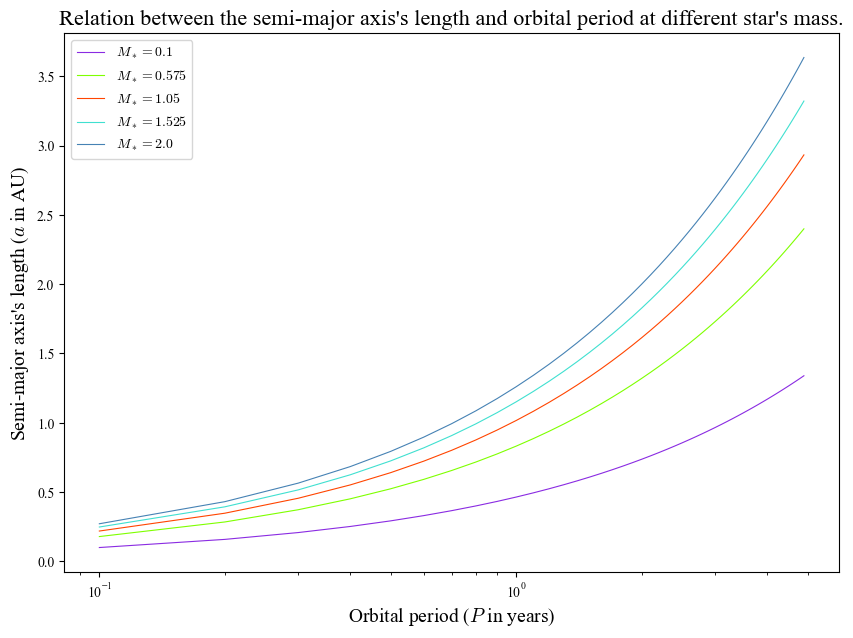

In [30]:
#Task 1.1
def get_kepler_semimajor(P, M_star):
    return pow(M_star * pow(P, 2), 1 / 3)

print(r"""The distance between the Earth and the Sun is {} AU.
The distance between the Jupiter and the Sun is {} AU.""".format(get_kepler_semimajor(1, 1), get_kepler_semimajor(12, 1)))

# Task 1.2
list_orbital_period = np.arange(0.1, 5, 0.1) # Does not include 5
list_star_mass = np.linspace(0.1, 2, 5)
list_semimajor = np.array([np.array([get_kepler_semimajor(p, m) for p in list_orbital_period]) for m in list_star_mass])

fig, ax = plt.subplots(figsize = (10, 7))
for i in range(len(list_semimajor)):
    ax.plot(list_orbital_period, list_semimajor[i], linewidth = 0.8, color = list_graph_color[i], label = r'$M_*={}$'.format(list_star_mass[i]))
ax.legend()

ax.set_ylabel(r"Semi-major axis's length ($a$ in AU)", fontsize = 14)
ax.set_xlabel(r'Orbital period ($P$ in years)', fontsize = 14)
ax.set_title("Relation between the semi-major axis's length and orbital period at different star's mass.", fontsize = 16)

ax.set_xscale('log')

# Task 1.3 left to be discussed.

# Task 2: Habitable region

If a star has a luminosity $L_*$ and the planet's orbit has a semi-major axis $a$, then the flux from the star at $a$ is 
\begin{equation}
    F_* = \frac{L_*}{4\pi a^2}
\end{equation}
We will let the planet's radius be $R_p$. Now, we define a new parameter named **albedo**, $A$, which denotes the fraction between reflected light and incident light. If $A=1$, then it means that all lights from the star are reflected. $A=0.6$ means only $40\%$ gets absorbed by the planet. Therefore, the absorbed energy per unit time by the planet is 
\begin{equation}
    L_\text{abs} = F_*\times (\pi R^2_p)\times (1-A) = \frac{(1-A)\pi R^2_pL_*}{4\pi a^2}.
\end{equation}
The energy emitted **by** the planet is given by Stefan-Boltzmann law:
\begin{equation}
    L_\text{em} = 4\pi R^2_p\sigma T_p^4.
\end{equation}
At **thermal equilibrium**, the rate of energy being absorbed and emitted must be equal. This yields
\begin{equation}
    T_p = \left[\frac{(1-A) L_\star}{16\pi\sigma a^2}\right]^{1/4}.
\end{equation}
And if we know the planet's temperature, $T_p$, then we can find the distance from the star, $a$, for which the planet has temperature $T_p$ by
\begin{equation}
    a = \left[\frac{(1-A) L_\star}{16\pi\sigma}\right]^{1/2} T_p^{-2}.
\end{equation}
To be safe, let us work in SI units before converting to AU.

**Task:** Make a graph with the mass of the star $M_\star$ (in solar masses) versus  $a_{\rm inner}$ and $a_{\rm outer}$ (in AU) that shows the boundaries (inner and outer) of the habitable zone around stars with masses from 0.1 to 2 times the mass of the Sun. Note that the luminosity of a star can be computed from the **mass-luminosity relation**:
\begin{equation}
    \frac{L_*}{L_\odot} = \left(\frac{M_*}{M_\odot}\right)^3.
\end{equation}
We were given the following constants:
\begin{equation*}
    \sigma = 5.67 \times 10^{-8}\ {\rm W m^{-2} ~K^{-4}},\quad L_\odot = 3.84\times 10^{26}\ {\rm W},\quad M_\odot = 1.99\times10^{30}\;\text{kg},\quad 1\;\text{AU} = 1.496\times 10^{11} {\rm m}.
\end{equation*}

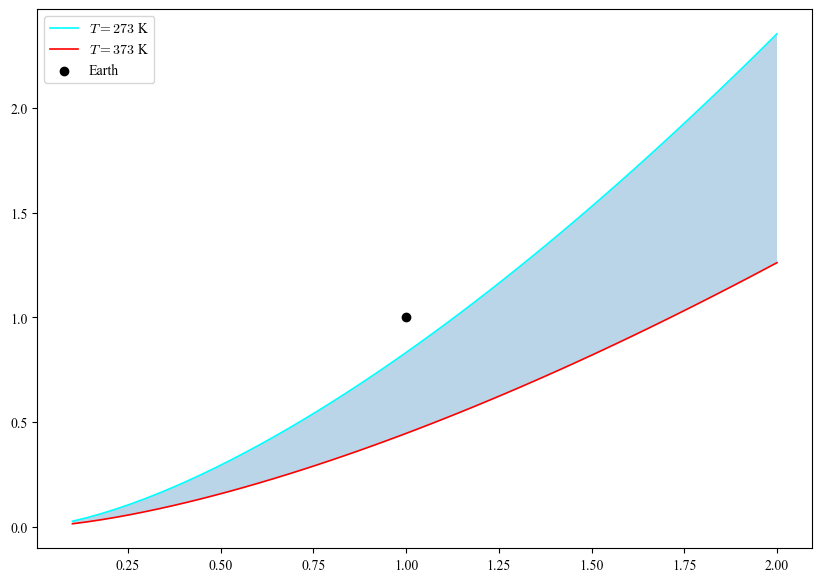

In [144]:
#Task 2

A = 0.36 # Albedo

def unit_m_to_au(x):
    # x in m
    au_in_m = np.float32(1.496e+11)
    return x / au_in_m 

def get_luminosity(M_star):
    # M_star in M_sun
    L_sun = np.float32(3.84e+26) # in W
    return L_sun * pow(M_star, 3) # in W

def get_semimajor(L_star, T_planet, albedo):
    sigma = np.float32(5.67e-8)
    return pow( (1 - albedo) * L_star / (16*np.pi*sigma), 1/2) / pow(T_planet, 2) # in m

list_star_mass = np.linspace(0.1, 2, 50)
list_luminosity = np.array([get_luminosity(mass) for mass in list_star_mass])
list_semimajor_inner = np.array([unit_m_to_au(get_semimajor(luminosity, 273, A)) for luminosity in list_luminosity])
list_semimajor_outer = np.array([unit_m_to_au(get_semimajor(luminosity, 373, A)) for luminosity in list_luminosity])

fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(list_star_mass, list_semimajor_inner, linewidth = 1.2, color = 'cyan', label = r'$T=273$ K')
ax.plot(list_star_mass, list_semimajor_outer, linewidth = 1.2, color = 'red', label = r'$T=373$ K')
ax.scatter(1, 1, label = 'Earth', color = 'black')
ax.fill_between(list_star_mass, list_semimajor_inner, list_semimajor_outer, alpha = 0.3)
ax.legend()

# Task 3: Exoplanet Transit Simulations
We will use MandelAgolLC to construct different transit curves. We will be plotting time and relative flux: for relative flux = 1 this means that the light from the star is not blocked at all, and for relative flux = 0.95 it means that the planet blocks 5% of light from the star.

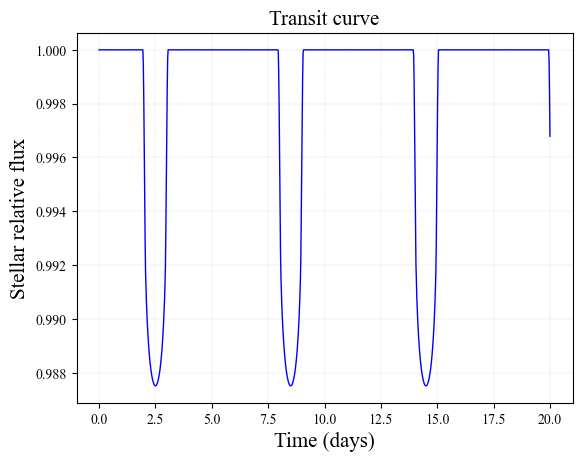

In [84]:
# Create MandelAgolLC object (planet) with circular orbit and quadratic limb darkening
planet =  ft.MandelAgolLC(orbit="circular", ld="quad")


#Parameter 1: Planet orbital period (days)
planet["per"] = 6

#Parameter 2:Orientation of the planet orbit with respect to the observed
# (i=90 degrees, means the planet transits through the middle of the stellar disc)
planet["i"] = 90

#Parameter 3:Semi-major axis of planetary orbit [stellar radii]
planet["a"] = 2

#Parameter 4: Time offset of transit center (effectively where is the lowest drop of the stellar flux)
planet["T0"] = 2.5

#Parameter 5: Radius ratio between planet and star.
planet["p"] = 0.1

#Other parameters (do not modify these -no need to worry about these now)
planet["linLimb"] = 0.5
planet["quadLimb"] = 0.2
planet["b"] = 0.

# Choose some time axis
# this defines the time sampling (how often do you observe the star)
# Note: Time unit is days
time = np.linspace(0, 20, 1000)

# Calculate the time evolution of the stellar brightness using the transit model
# The function "evaluate" acts on "planet" to give the stellar_flux vs time
stellar_flux = planet.evaluate(time)

plt.title ("Transit curve", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)

# put grid on the graph
plt.grid(color='grey', linestyle=':', linewidth=0.2)
plt.grid(True)

# Let's see what happened ...
plt.plot(time, stellar_flux, color='blue', linewidth=1)

plt.show()

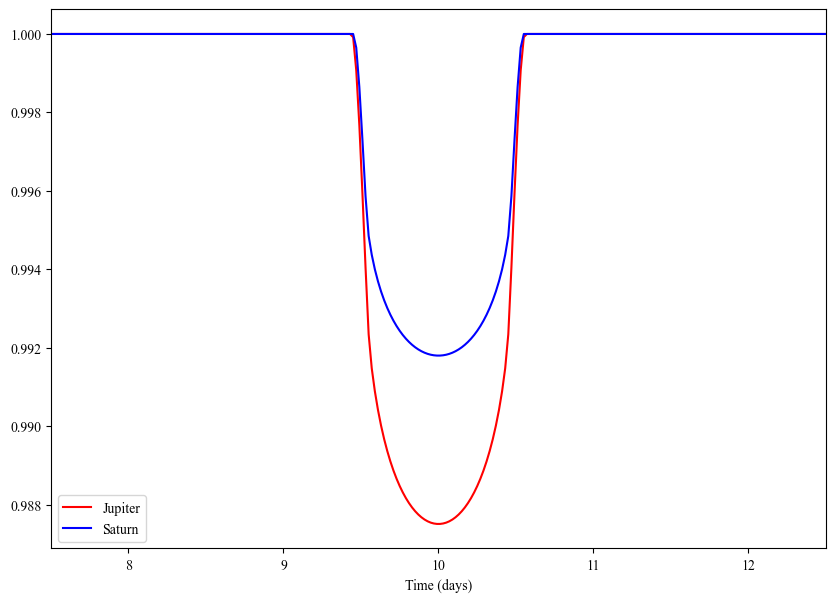

In [87]:
# Create MandelAgolLC object (planet) with circular orbit and quadratic limb darkening
jupiter =  ft.MandelAgolLC(orbit="circular", ld="quad")
saturn =  ft.MandelAgolLC(orbit="circular", ld="quad")

#Parameter 1: Planet orbital period (days)
jupiter["per"] = 6
saturn["per"] = 6

#Parameter 2:Orientation of the planet orbit with respect to the observed
# (i=90 degrees, means the planet transits through the middle of the stellar disc)
jupiter["i"] = 90
saturn["i"] = 90

#Parameter 3:Semi-major axis of planetary orbit [stellar radii]
jupiter["a"] = 2
saturn["a"] = 2

#Parameter 4: Time offset of transit center (effectively where is the lowest drop of the stellar flux)
jupiter["T0"] = 10.0
saturn["T0"] = 10.0

#Parameter 5: Radius ratio between planet and star.
jupiter["p"] = 0.100
saturn["p"] = 0.081

#Other parameters (do not modify these -no need to worry about these now)
jupiter["linLimb"] = saturn["linLimb"] = 0.5
jupiter["quadLimb"] = saturn["quadLimb"] = 0.2
jupiter["b"] = saturn["b"] = 0

# Choose some time axis
# this defines the time sampling (how often do you observe the star)
# Note: Time unit is days
time = np.linspace(0, 20, 1000)

# Calculate the time evolution of the stellar brightness using the transit model
# The function "evaluate" acts on "planet" to give the stellar_flux vs time
stellar_flux_jupiter = jupiter.evaluate(time)
stellar_flux_saturn = saturn.evaluate(time)

fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(time, stellar_flux_jupiter, color = 'red', label = 'Jupiter')
ax.plot(time, stellar_flux_saturn, color = 'blue', label = 'Saturn')

ax.set_xlabel("Time (days)")
ax.set_xlim(7.5, 12.5)
ax.legend()


# Task 4: Finding Exoplanets using Transit Method
Note the relation $R_\text{planet} = R_*\sqrt{\text{depth}}$.

===== PLANET 1: LARGE DIP (HIGH FREQUENCY) =====
Peroid: 99.5445849359894 hours.
Depth: 0.012590307250000016.

===== PLANET 2: SMALL DIP (LOW FREQUENCY) =====
Period: 217.23109996800486 hours.
Depth: 0.001039266499999969.


(51500.0, 53100.0)

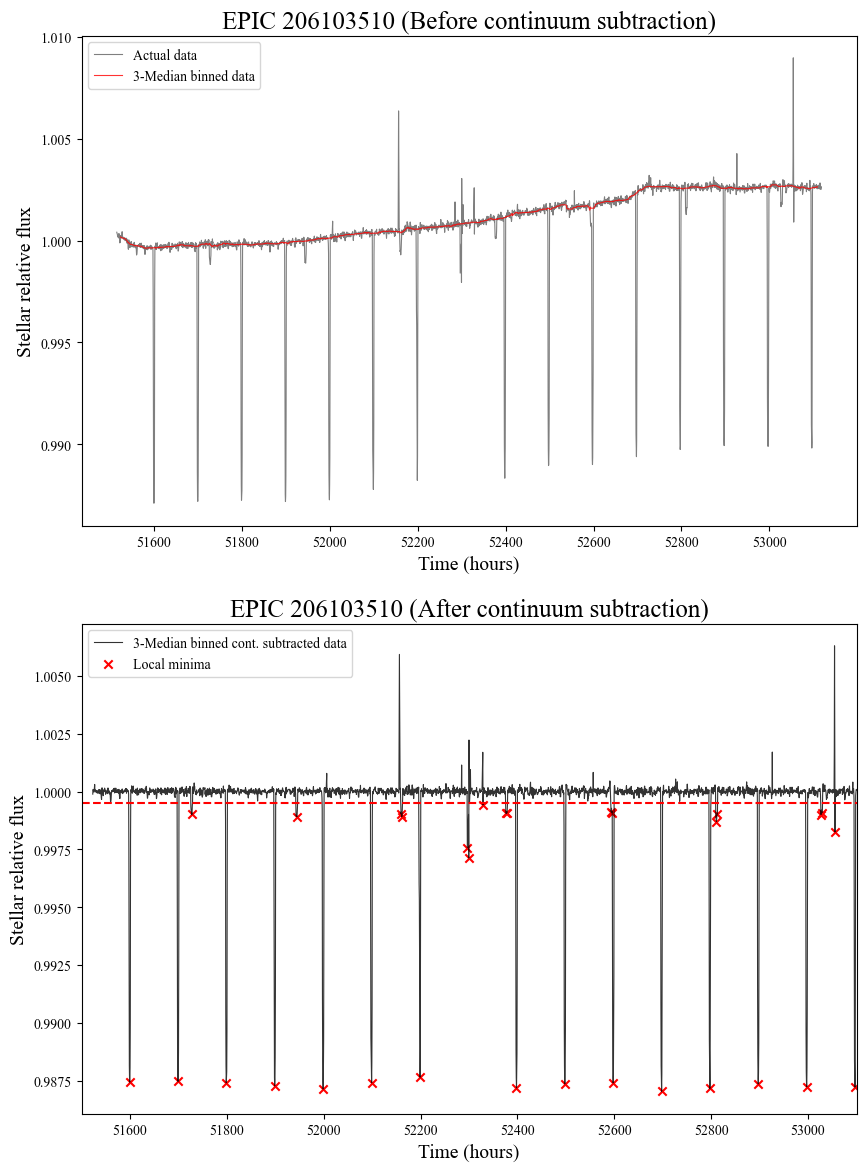

In [138]:
# Task 4.1

exoplanet_data = pd.read_csv('EPIC206103150.txt', delimiter = ',', usecols = range(2), names=['time','flux'], skiprows=[0])
list_time = np.array(exoplanet_data['time']) * 24
list_flux = np.array(exoplanet_data['flux'])

# The rest are many tasks mushed together

def SNR_bin(data, bins, mode):
  if mode == 'mean':
    return np.array([st.mean(data[i:i+bins]) for i in range(len(data) - (bins - 1))])
  else:
    return np.array([st.median(data[i:i+bins]) for i in range(len(data) - (bins - 1))])

bins = 31

list_time_binned = SNR_bin(list_time, bins, 'mean')
list_flux_binned = SNR_bin(list_flux, bins, 'med')

list_time_new = list_time[bins // 2: -(bins // 2)]
list_flux_new = list_flux[bins // 2: -(bins // 2)] - list_flux_binned # + 1 when you plot

# Finding desired local minima
peaks, _ = find_peaks(-1 * list_flux_new, height = 0.0005)
list_time_new_peak = list_time_new[peaks]
list_flux_new_peak = list_flux_new[peaks] + 1

period_dip_small = list_time_new_peak[5] - list_time_new_peak[2]
period_dip_big = list_time_new_peak[1] - list_time_new_peak[0]

depth_dip_small = st.mean(1- list_flux_new_peak[i] for i in [2, 5])
depth_dip_big = st.mean(1 - list_flux_new_peak[i] for i in [0, 1, 3, 4])

# print("Small dip period: {} hours. Large dip period: {} hours.".format(period_dip_small, period_dip_big))

planet1_period = period_dip_big 
planet2_period = period_dip_small 
planet1_depth = depth_dip_big
planet2_depth = depth_dip_small

print("""===== PLANET 1: LARGE DIP (HIGH FREQUENCY) =====
Peroid: {} hours.
Depth: {}.

===== PLANET 2: SMALL DIP (LOW FREQUENCY) =====
Period: {} hours.
Depth: {}.""".format(planet1_period, planet1_depth, planet2_period, planet2_depth))

fig, axs = plt.subplots(2, 1, figsize = (10, 14))
axs[0].plot(list_time, list_flux, color = 'black', linewidth = 0.8, alpha = 0.5, label = 'Actual data')
axs[0].plot(list_time_binned, list_flux_binned, color = 'red', linewidth = 0.8, alpha = 0.8, label = '3-Median binned data')

axs[0].set_ylabel('Stellar relative flux', fontsize = 14)
axs[0].set_xlabel('Time (hours)', fontsize = 14)
axs[0].set_title('EPIC 206103510 (Before continuum subtraction)', fontsize = 18)
axs[0].legend()

axs[1].plot(list_time_new, list_flux_new + 1, color = 'black', linewidth = 0.8, alpha = 0.8, label = '3-Median binned cont. subtracted data')
axs[1].scatter(list_time_new_peak, list_flux_new_peak, color = 'red', marker = 'x', label = 'Local minima')

axs[1].hlines(0.9995, 51500, 53100, color = 'red', linestyles = '--')
axs[1].set_ylabel('Stellar relative flux', fontsize = 14)
axs[1].set_xlabel('Time (hours)', fontsize = 14)
axs[1].set_title('EPIC 206103510 (After continuum subtraction)', fontsize = 18)
axs[1].legend()

axs[1].set_xlim(51500, 53100)

In [140]:
radius_star = 1.15 # in R_odot
mass_star = 1.03 # in M_odot

# PLANET 1 is the large dip
planet1_radius = radius_star * pow(planet1_depth, 1/2) * 10 # in R_J
planet2_radius = radius_star * pow(planet2_depth, 1/2) * 10 # in R_J

planet1_semimajor = pow(mass_star * pow(planet1_period / (24 * 365.25), 2), 1/3) # in AU
planet2_semimajor = pow(mass_star * pow(planet2_period / (24 * 365.25), 2), 1/3) # in AU

print("""===== PLANET 1 PROFILE =====
Period: {} hours
Radius: {} R_J
Stellar radius: {} AU

===== PLANET 2  PROFILE =====
Period: {} hours
Radius: {} R_J
Stellar radius: {} AU""".format(planet1_period, planet1_radius, planet1_semimajor, planet2_period, planet2_radius, planet2_semimajor))


===== PLANET 1 PROFILE =====
Period: 99.5445849359894 hours
Radius: 1.2903751911023793 R_J
Stellar radius: 0.05102188788227206 AU

===== PLANET 2  PROFILE =====
Period: 217.23109996800486 hours
Radius: 0.37073305035428916 R_J
Stellar radius: 0.08584060401800903 AU
